# H1N1 VACCINE PREDICTION NOTEBOOK
#### Where we make a model to predict whether a person has recieved the h1n1 vaccine based on different parameters.

##### Data Loading and Visualisation

In [116]:
# importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [117]:
# loading the dataset and checking for null values
ds=pd.read_csv("h1n1_vaccine_prediction.csv")
ds.isnull().sum()


unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

In [118]:
ds.shape # checking the shape of the dataset

(26707, 34)

In [119]:
ds.columns # taking note of all the columns present in the dataset

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [120]:
def fill_median(x): # defining a function which replaces all the null values of the input columns with their medians
    for i in x:
        ds[i]=ds[i].fillna(ds[i].median())


In [121]:
num_cols=['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc','no_of_adults', 'no_of_children']

       
fill_median(num_cols)

In [122]:
# Replacing the null values of the columns containing non_numeric data with their medians
ds.qualification.fillna('Some College',inplace=True)
ds.income_level.fillna('<= $75,000, Above Poverty',inplace=True)
ds.employment.fillna('Employed',inplace=True)
ds.marital_status.fillna('Married',inplace=True)
ds.housing_status.fillna('Own',inplace=True)
        

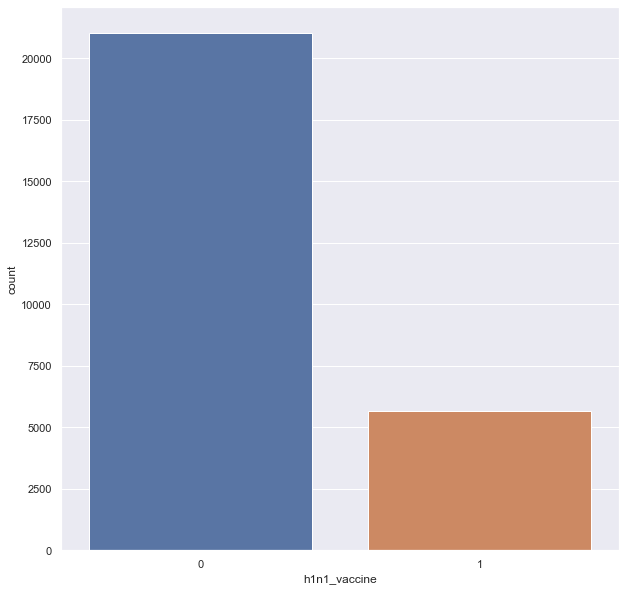

In [123]:
plt.figure(figsize=(10,10))
sns.countplot(ds['h1n1_vaccine']);
plt.show()


#### We observe that most people (about 80%) have not taken the h1n1 vaccine

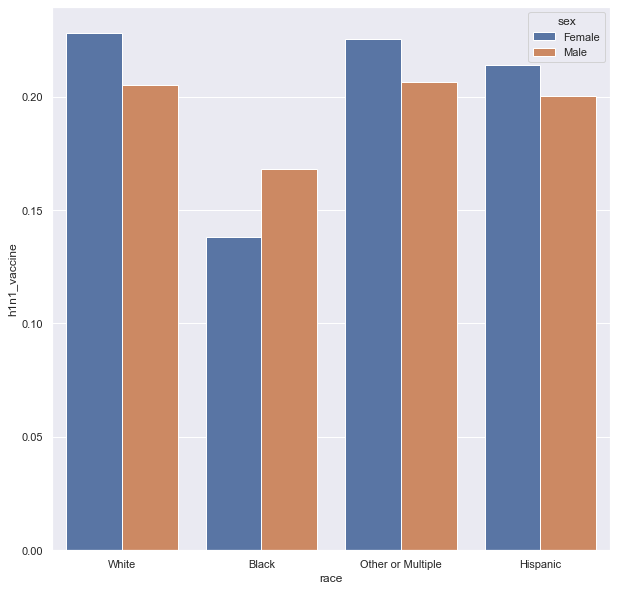

In [124]:
plt.figure(figsize=(10,10))
sns.barplot(ds['race'],ds['h1n1_vaccine'],hue=ds['sex'],ci=None)
sns.set_style('whitegrid')
plt.show()

#### More number of white people have recieved the h1n1_vaccine and Black people (especially females) have recieved the least amount of vaccine.

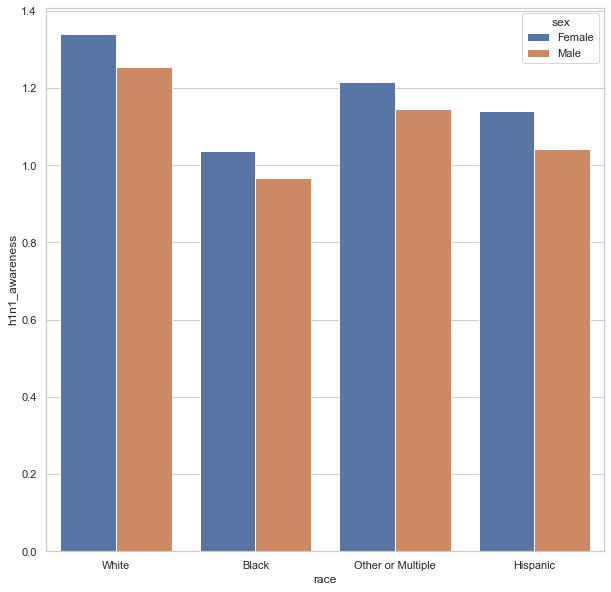

In [125]:
plt.figure(figsize=(10,10))
sns.barplot(ds['race'],ds['h1n1_awareness'],hue=ds['sex'],ci=None)
sns.set_style('whitegrid')
plt.show()

#### White people have the awareness of h1n1 relatively more whilst Black people are less aware comparatively.

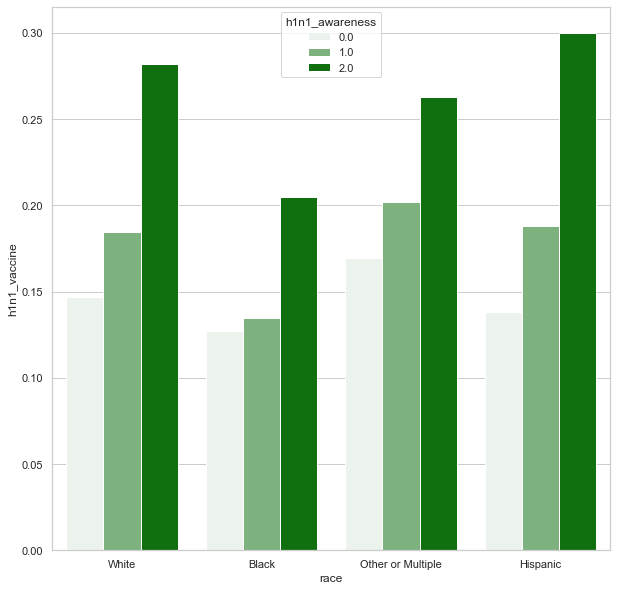

In [126]:
plt.figure(figsize=(10,10))
sns.barplot(ds['race'],ds['h1n1_vaccine'],hue=ds['h1n1_awareness'],ci=None,color='green')
sns.set_style('whitegrid')
plt.show()

####  People who are most aware about h1n1 have higher chance of getting h1n1 vaccine. Hispanic people with high awareness have most chance of getting the h1n1 vaccine.

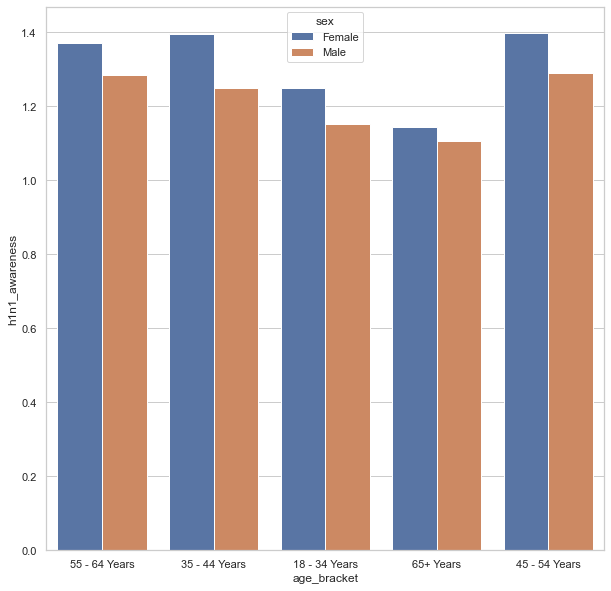

In [127]:
plt.figure(figsize=(10,10))
sns.barplot(ds['age_bracket'],ds['h1n1_awareness'],hue=ds['sex'],ci=None)
sns.set_style('whitegrid')
plt.show()

#### Females in the age bracket of 35-54 years have the highest awareness of h1n1. Older males have comparatively lower awareness of h1n1.

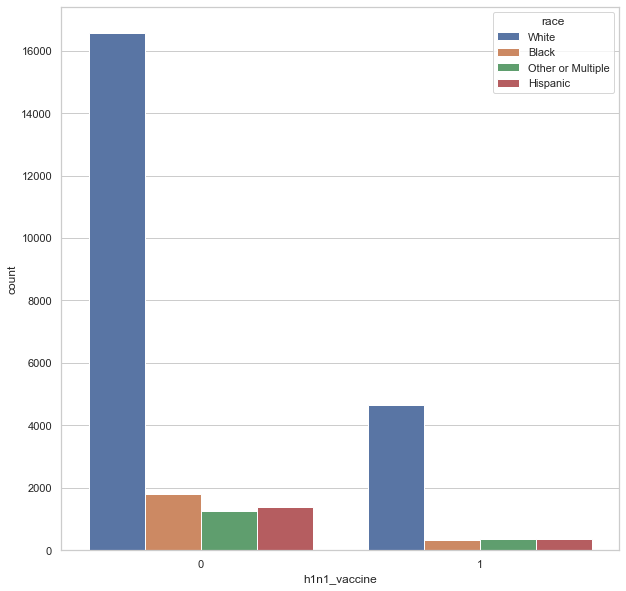

In [128]:
plt.figure(figsize=(10,10))
sns.countplot(ds['h1n1_vaccine'],hue=ds['race'])
plt.show()

#### White people have recieved the most vaccines whereas Black people have least.

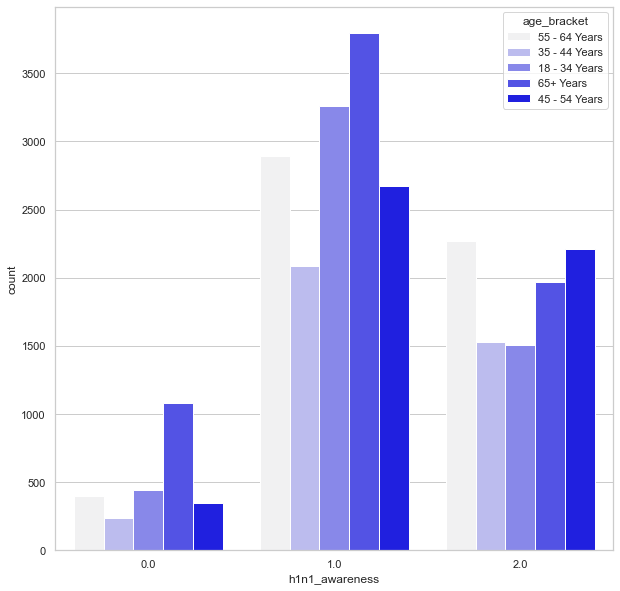

In [129]:
plt.figure(figsize=(10,10))
sns.countplot(ds['h1n1_awareness'],hue=ds['age_bracket'],color='blue')
sns.set_style('darkgrid')
plt.show()

#### People in the age group of 45-65 years have comparatively higher awareness of h1n1 while most people have moderate awareness.

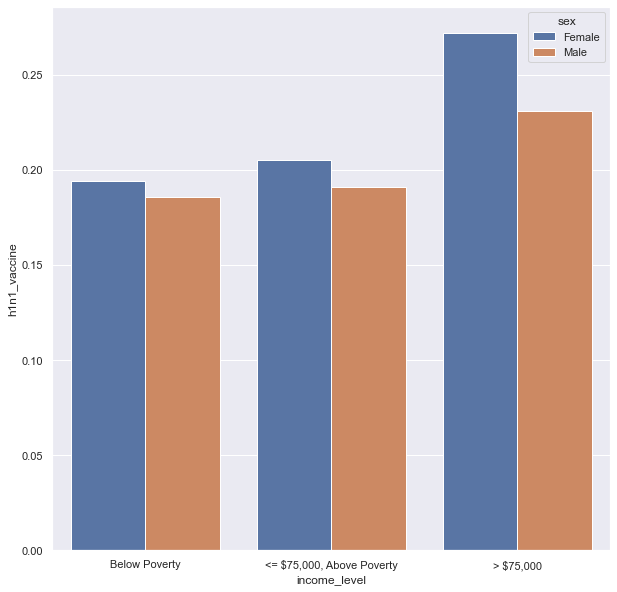

In [130]:
plt.figure(figsize=(10,10))
sns.barplot(ds['income_level'],ds['h1n1_vaccine'],hue=ds['sex'],ci=None)
sns.set_style('whitegrid')
plt.show()

#### People who earn more than $75,000 have more chance of getting a vaccine (especially females). 

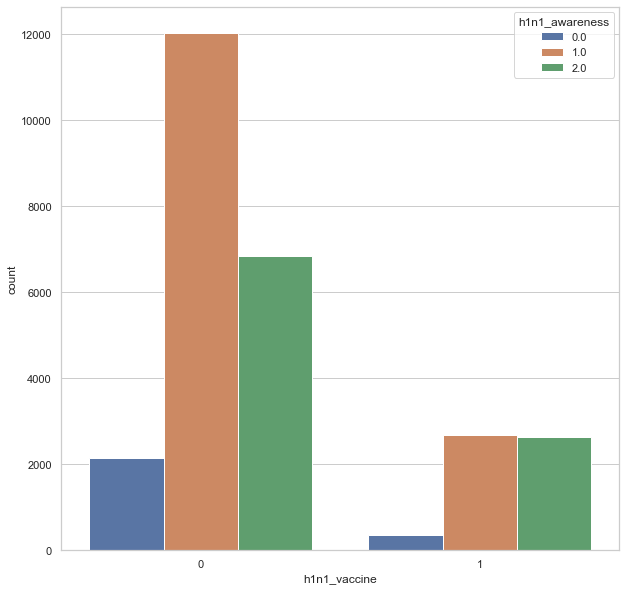

In [131]:
plt.figure(figsize=(10,10))
sns.countplot(ds['h1n1_vaccine'],hue=ds['h1n1_awareness'])
sns.set_style('whitegrid')
plt.show()

#### Even the people who are somewhat aware of h1n1 have not recieved the vaccine. As expected, very low amount people with low awareness of h1n1 have recieved the vaccine.

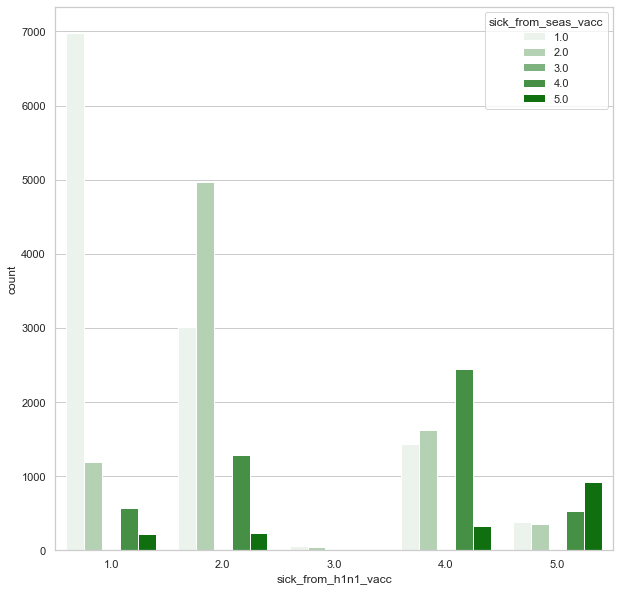

In [132]:
plt.figure(figsize=(10,10))
sns.countplot(ds['sick_from_h1n1_vacc'],hue=ds['sick_from_seas_vacc'],color='green')
sns.set_style('darkgrid')
plt.show()

#### Most people are mildly sick from the h1n1 vaccine and seasonal vaccines. People who are more affected by the h1n1 vaccine also got low immunity against seasonal vaccine.

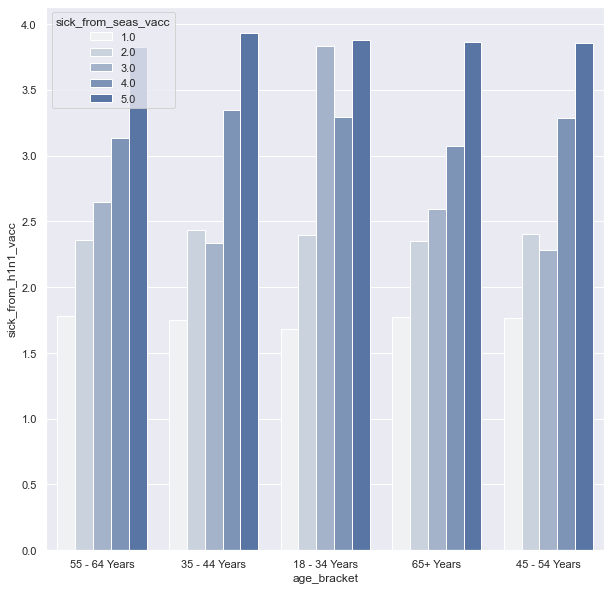

In [133]:
plt.figure(figsize=(10,10))
sns.barplot(ds['age_bracket'],ds['sick_from_h1n1_vacc'],hue=ds['sick_from_seas_vacc'],color='b',ci=None)
sns.set_style('darkgrid')
plt.show() 

#### People in the age group 18-44 yearshave more chance of getting sick from h1n1 vaccine. These people also have the highest chance of getting sick from seasonal vaccine.

In [134]:
# Mapping all the non_numeric columns 
ds['race']=ds['race'].map({'White':1,'Black':2,'Hispanic':3,'Other or Multiple':4})
ds['sex']=ds['sex'].map({'Male':0,'Female':1})
ds['age_bracket']=ds['age_bracket'].map({'55 - 64 Years':55,'35 - 44 Years':35,'18 - 34 Years':18,'65+ Years':65,'45 - 54 Years':45})
ds['census_msa']=ds['census_msa'].map({'Non-MSA':1,'MSA, Not Principle  City':2,'MSA, Principle City':3})
ds['qualification']=ds['qualification'].map({'< 12 Years':1,'12 Years':2,'Some College':3,'College Graduate':4})
ds['income_level']=ds['income_level'].map({'Below Poverty':1,'<= $75,000, Above Poverty':2,'> $75,000':3})
ds['marital_status']=ds['marital_status'].map({'Not Married':0,'Married':1})
ds['housing_status']=ds['housing_status'].map({'Own':0,'Rent':1})
ds['employment']=ds['employment'].map({'Not in Labor Force':0,'Unemployed':1,'Employed':2})

In [135]:
ds.drop(['unique_id'],axis=1,inplace=True) # dropping the unnecssary columns

### Splitting the data

In [136]:
x_train,x_test,y_train,y_test=train_test_split(ds.drop(['h1n1_vaccine'],axis=1),ds['h1n1_vaccine'],test_size=.25,random_state=33)

### Model loading and evaluation



#### Logistic Regression Model



In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(fit_intercept=True,random_state=43)

In [138]:
model.fit(x_train,y_train)

LogisticRegression(random_state=43)

In [139]:
preds=model.predict(x_test)
model.score(x_train,y_train),model.score(x_test,y_test)

(0.8325511732401398, 0.8325595327242774)

In [140]:
accuracy_score(y_test,preds)

0.8325595327242774

#### Support Vector Machine model

In [141]:
from sklearn.svm import SVC
model_2=SVC(kernel='linear',degree=3,C=.01)

In [142]:
model_2.fit(x_train,y_train)

SVC(C=0.01, kernel='linear')

In [143]:
pred_2=model.predict(x_test)
model_2.score(x_train,y_train),model_2.score(x_test,y_test)

(0.8309535696455317, 0.8339074434626329)

In [144]:
accuracy_score(y_test,pred_2)

0.8325595327242774

### Confusion Matrix

[[4968  320]
 [ 798  591]]


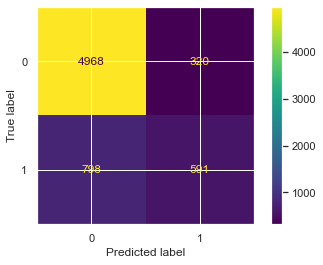

In [145]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay.from_predictions(y_test,pred_2)
print(disp.confusion_matrix)